In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ds = pd.read_csv('/content/drive/MyDrive/CONSULTING PROJECT/Archive.zip (Unzipped Files)/Predict_donor.csv')
df = pd.read_csv('/content/drive/MyDrive/CONSULTING PROJECT/Archive.zip (Unzipped Files)/Raw_Data_for_train_test.csv')

In [4]:
df.head(10)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
5,0,NaN,52,101,63.0,0,U,3,8,U,...,7.0,10.0,3.0,10.0,9,20,19,91,5.82,6
6,0,NaN,53,89,71.0,0,R,3,50,H,...,15.0,20.0,5.0,20.0,7,18,21,91,11.00,8
7,1,5.0,67,89,79.0,0,C,2,28,H,...,4.0,7.0,3.0,5.0,9,24,9,91,5.05,8
8,0,NaN,70,89,41.0,0,C,3,30,H,...,4.0,7.0,3.0,5.0,11,25,17,91,5.03,14
9,1,16.0,71,101,63.0,0,R,2,43,H,...,8.0,11.0,3.0,8.0,11,27,9,91,6.82,13


In [5]:
ds.head(10)

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,NaN,0,R,2,46,U,F,NaN,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,NaN,0,R,2,43,U,F,NaN,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,2,H,M,6.0,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,NaN,0,T,2,40,U,F,2.0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2
5,458,125,80.0,0,T,2,37,U,F,NaN,...,10.0,15.0,5.0,15.0,7,14,25,124,9.67,8
6,564,89,59.0,0,C,1,24,H,F,7.0,...,45.0,50.0,5.0,18.0,11,24,16,79,21.00,7
7,665,41,53.0,0,T,2,40,H,F,3.0,...,10.0,20.0,10.0,15.0,11,27,16,73,13.67,1
8,702,101,75.0,0,T,1,35,H,F,7.0,...,7.0,11.0,4.0,10.0,10,26,13,92,7.95,7
9,743,113,60.0,0,R,2,46,H,M,5.0,...,10.0,15.0,5.0,10.0,11,27,11,113,9.73,10


In [6]:
df.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [7]:
df=df.drop(['TARGET_D'],axis=1)
df['DONOR_AGE']=df['DONOR_AGE'].fillna(df['DONOR_AGE'].mean())
df['DONOR_AGE']=df['DONOR_AGE'].astype('int64')
df['INCOME_GROUP']=df['INCOME_GROUP'].fillna(df['INCOME_GROUP'].mode()[0])
df['INCOME_GROUP']=df['INCOME_GROUP'].astype('int64')
df['WEALTH_RATING']=df['WEALTH_RATING'].fillna(df['WEALTH_RATING'].mode()[0])
df['WEALTH_RATING']=df['WEALTH_RATING'].astype('int64')
df=df.dropna()
df['URBANICITY']=df['URBANICITY'].str.replace('?','S')
df['SES']=df['SES'].str.replace('?','2')
df['SES']=df['SES'].astype('int64')
df['CLUSTER_CODE']=df['CLUSTER_CODE'].str.replace('.','40')
df['CLUSTER_CODE']=df['CLUSTER_CODE'].astype('int64')

<Axes: xlabel='TARGET_B', ylabel='IN_HOUSE'>

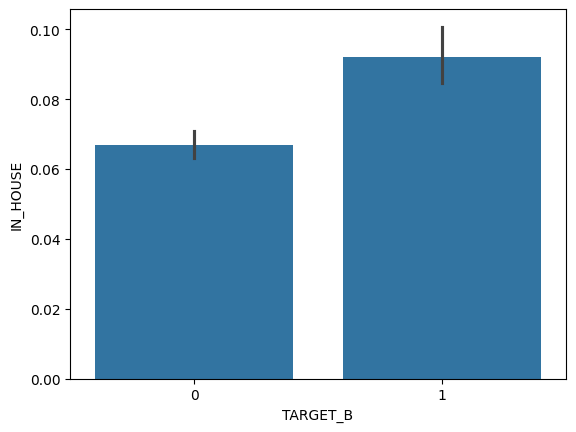

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=df['TARGET_B'],y=df['IN_HOUSE'],data=df)

<Axes: xlabel='TARGET_B', ylabel='URBANICITY'>

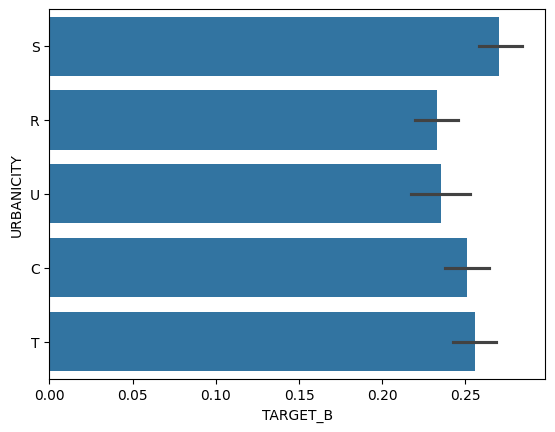

In [9]:
sns.barplot(x=df['TARGET_B'],y=df['URBANICITY'],data=df)

<Axes: xlabel='TARGET_B', ylabel='count'>

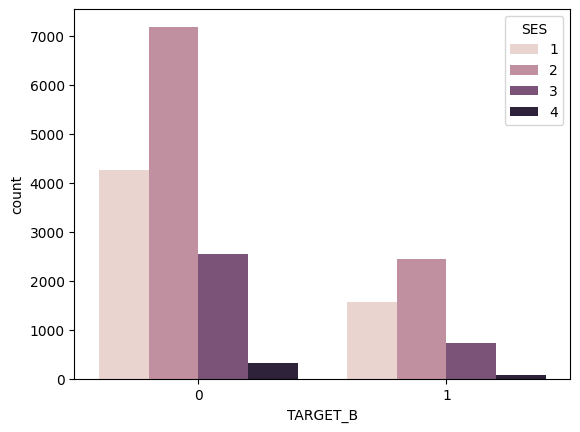

In [10]:
sns.countplot(x=df['TARGET_B'],
              hue=df['SES'],data=df)

<Axes: xlabel='TARGET_B', ylabel='count'>

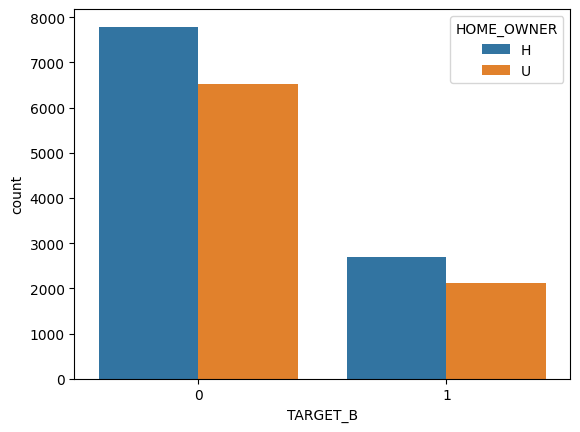

In [11]:
sns.countplot(x=df['TARGET_B'],hue=df['HOME_OWNER'],data=df)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [13]:
y=df['TARGET_B']
x=df.drop(['TARGET_B'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)
print(score_1)

0.7618923157344485


In [16]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):

    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(x_test)
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)

max(list_1)

0.7553580763199164

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
score_2=accuracy_score(y_test,pred_2)
print(score_2)

0.7608468374281233


In [18]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Score': [score_1, max(list_1), score_2]
})

model_comparison

,Model,Score
0,Logistic Regression,0.761892
1,KNN,0.755358
2,Random Forest,0.760847


In [19]:
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [20]:
da = pd.read_csv('/content/drive/MyDrive/CONSULTING PROJECT/census  (1).csv')

In [21]:
da.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United_Kingdom,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United_Kingdom,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United_Kingdom,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United_Kingdom,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United_Kingdom,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United_Kingdom,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United_Kingdom,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United_Kingdom,>50K


In [22]:
da.shape

(45222, 14)

In [23]:
da.info()
da.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education_level  45222 non-null  object
 3   education-num    45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   sex              45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [24]:
da.nunique().sort_values()

sex                  2
income               2
race                 5
relationship         6
workclass            7
marital-status       7
occupation          14
education_level     16
education-num       16
native-country      38
age                 74
hours-per-week      96
capital-loss        97
capital-gain       121
dtype: int64

In [25]:
da.describe().round(3)

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000,45222.000,45222.00,45222.000,45222.000
mean,38.548,10.118,1101.43,88.595,40.938
std,13.218,2.553,7506.43,404.956,12.008
min,17.000,1.000,0.00,0.000,1.000
25%,28.000,9.000,0.00,0.000,40.000
50%,37.000,10.000,0.00,0.000,40.000
75%,47.000,13.000,0.00,0.000,45.000
max,90.000,16.000,99999.00,4356.000,99.000


### GRAPHS AND PLOTS

<Axes: xlabel='workclass', ylabel='count'>

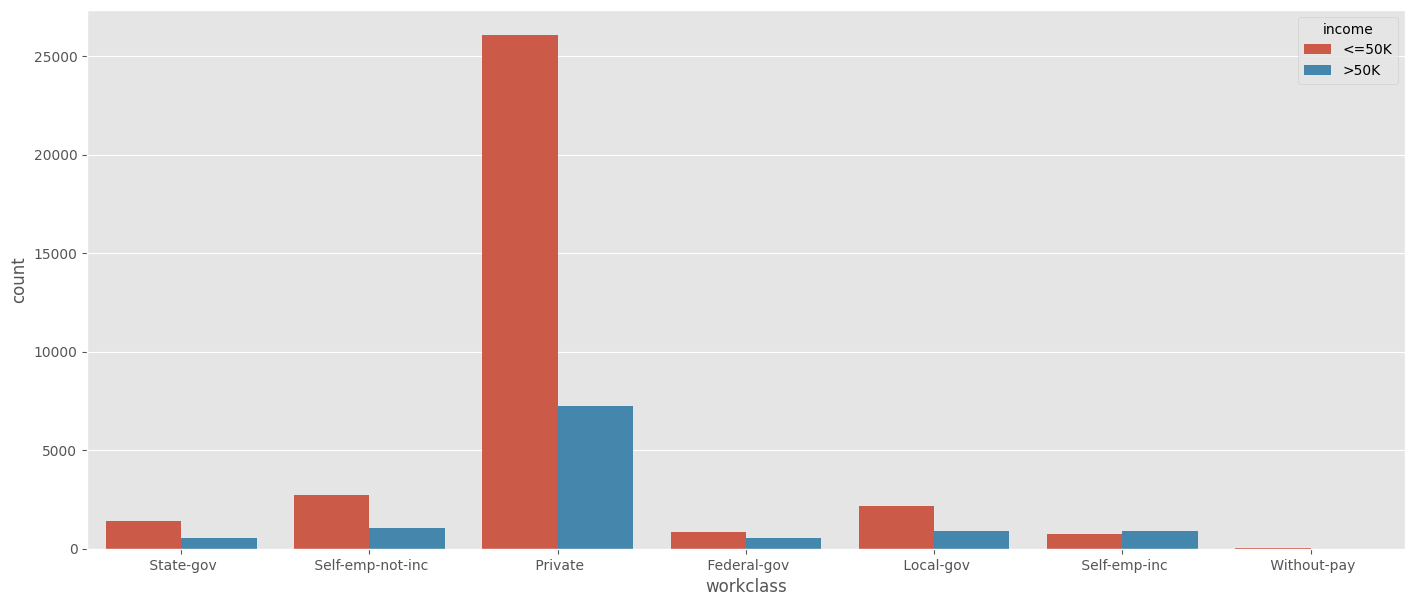

In [26]:
plt.figure(figsize=(17,7))
sns.countplot(x=da["workclass"],hue=da["income"])

<Axes: xlabel='age', ylabel='count'>

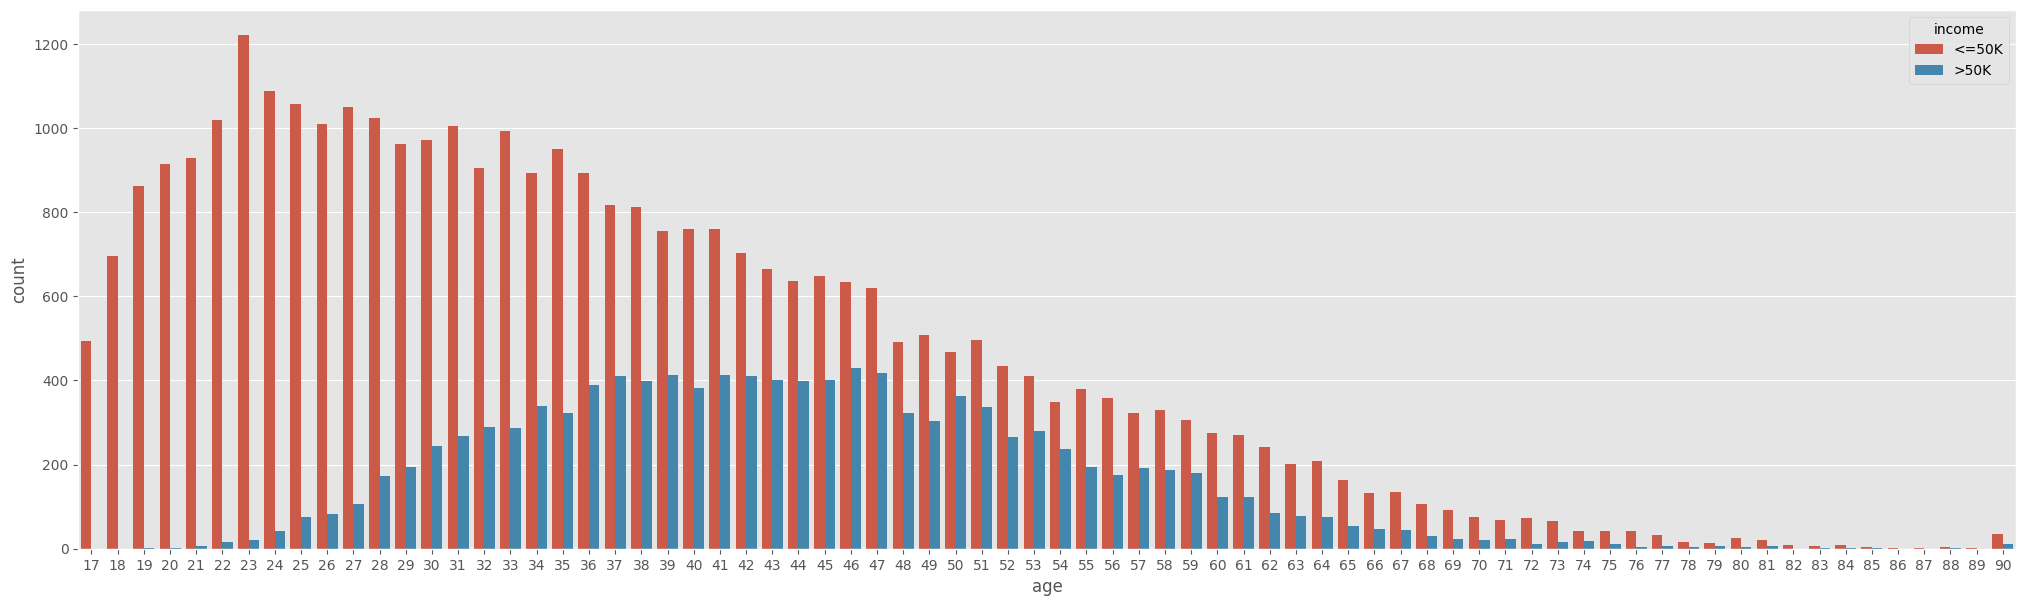

In [27]:
plt.figure(figsize=(25,7))
sns.countplot(x=da["age"],hue=da["income"])

<Axes: xlabel='education_level', ylabel='count'>

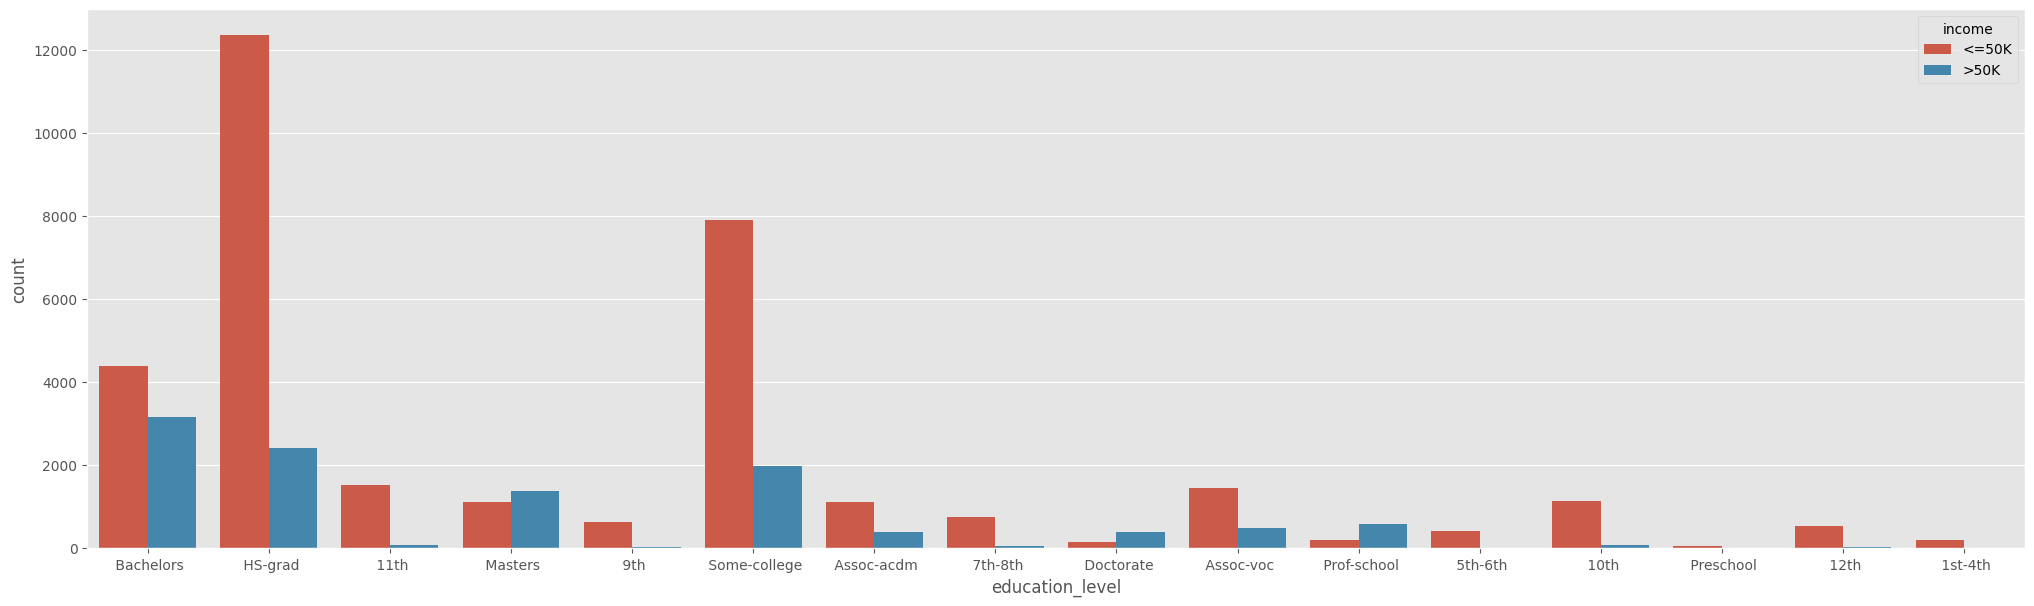

In [28]:
plt.figure(figsize=(25,7))
sns.countplot(x=da["education_level"],hue=da["income"])

<Axes: xlabel='sex', ylabel='count'>

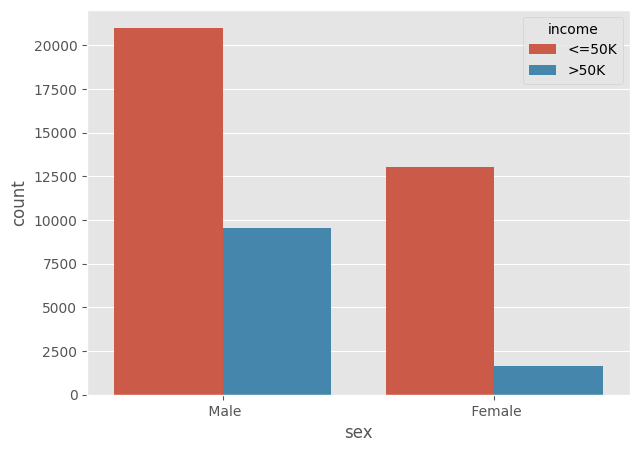

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(x=da["sex"],hue=da["income"])

<Axes: xlabel='race', ylabel='count'>

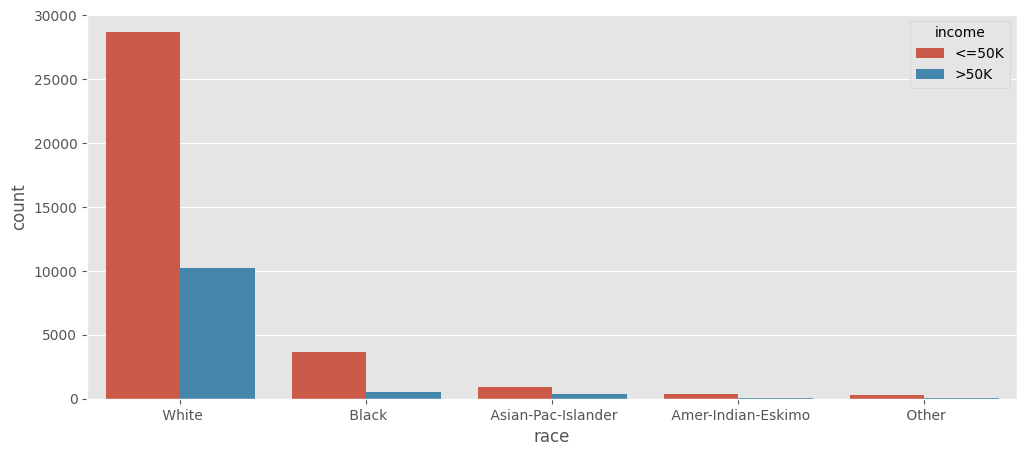

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(x=da["race"],hue=da["income"])

In [31]:
da['native-country'].value_counts(normalize=True)

native-country
United_Kingdom                 0.913095
 India                         0.023219
 Philippines                   0.006258
 China                         0.006103
 Germany                       0.004268
Pakisthan                      0.003870
 El-Salvador                   0.003251
 Cuba                          0.002941
 England                       0.002631
 Cambodia                      0.002388
 Jamaica                       0.002278
 South                         0.002233
 Italy                         0.002211
 Dominican-Republic            0.002145
 Japan                         0.001968
 Guatemala                     0.001902
 Vietnam                       0.001835
 Poland                        0.001791
 Haiti                         0.001526
 Portugal                      0.001371
 Iran                          0.001238
 Taiwan                        0.001216
 Greece                        0.001084
 Nicaragua                     0.001061
 Peru                    

<Axes: xlabel='age', ylabel='hours-per-week'>

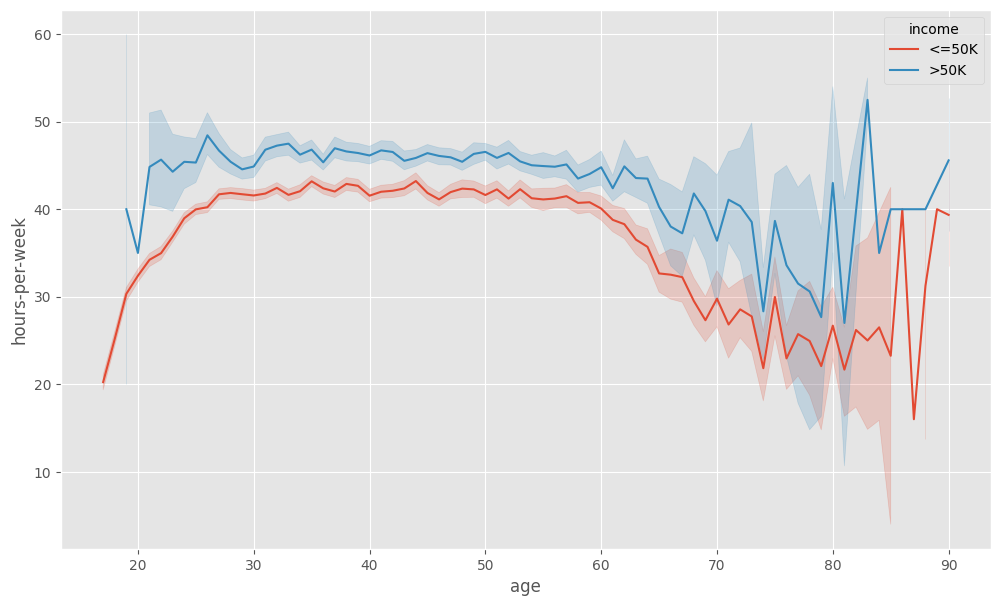

In [32]:
plt.figure(figsize=(12,7))
sns.lineplot(data=da,x="age",y="hours-per-week",hue="income")

<Axes: xlabel='relationship', ylabel='hours-per-week'>

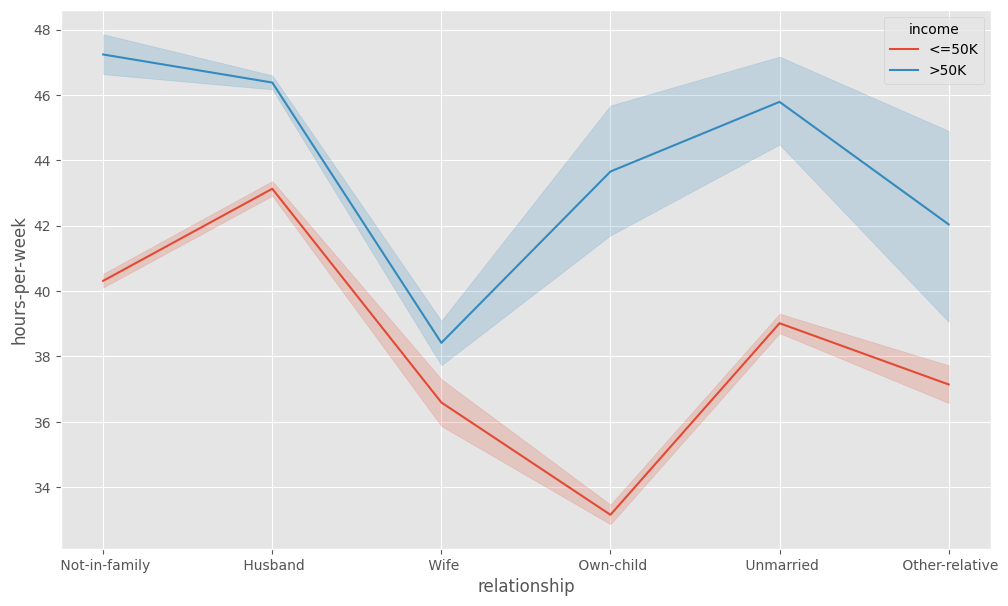

In [33]:
plt.figure(figsize=(12,7))
sns.lineplot(data=da,x="relationship",y="hours-per-week",hue="income")

In [34]:
px.scatter(da,x="age",y="hours-per-week",color="income",animation_frame="education_level")

In [35]:
px.scatter(da,x="age",y="hours-per-week",color="income",animation_frame="race")

## MODEL

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.inspection import permutation_importance

from sklearn.feature_selection import SelectPercentile ,chi2

from sklearn.feature_selection import SelectFromModel

In [37]:
df.head()

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87,0,2,2,40,0,2,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79,0,1,2,45,0,2,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75,0,2,1,11,0,1,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,58,0,4,2,4,0,1,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74,0,1,2,49,1,1,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [38]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education_level  45222 non-null  object
 3   education-num    45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   sex              45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [39]:
#separating numeric dataframes from object dataframes

cat = []
num = []
for i in da.columns:
    if da[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=da[num]
data_c=da[cat]

In [40]:
data_n.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [41]:
data_c.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United_Kingdom,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United_Kingdom,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United_Kingdom,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United_Kingdom,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [42]:
col=data_c.columns
print(col)

label_encoders = {}
categorical_columns = data_c.columns
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

Index(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


<ipython-input-42-857ad8c4f3a8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-857ad8c4f3a8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-857ad8c4f3a8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-857ad8c

In [43]:
data_c.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
0,5,9,4,0,1,4,1,37,0
1,4,9,2,3,0,4,1,37,0
2,2,11,0,5,1,4,1,37,0
3,2,1,2,5,0,2,1,37,0
4,2,9,2,9,5,2,0,2,0


In [44]:
frames = [data_c, data_n]

data = pd.concat(frames,axis=1)
data.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,37,0,39,13,2174,0,40
1,4,9,2,3,0,4,1,37,0,50,13,0,0,13
2,2,11,0,5,1,4,1,37,0,38,9,0,0,40
3,2,1,2,5,0,2,1,37,0,53,7,0,0,40
4,2,9,2,9,5,2,0,2,0,28,13,0,0,40


In [45]:
data.shape

(45222, 14)

In [46]:
data.isnull().sum()

workclass          0
education_level    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
native-country     0
income             0
age                0
education-num      0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

<Axes: >

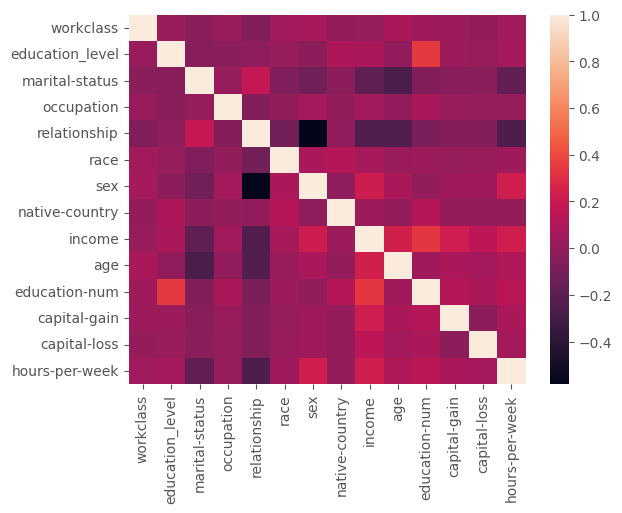

In [47]:
sns.heatmap(data.corr())

In [48]:
X = data.drop(columns="income")
y = data["income"]    # y = quality

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (31655, 13)
X Test  :  (13567, 13)
Y Train :  (31655,)
Y Test  :  (13567,)


In [49]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
XGB = XGBClassifier()
SVC=SVC()

In [50]:

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() : 80.06928576693447
DecisionTreeClassifier() : 81.31495540650107
RandomForestClassifier() : 84.99299771504386
KNeighborsClassifier() : 83.77681138055576
MLPClassifier() : 83.76206972801651
KNeighborsClassifier() : 83.77681138055576
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=

## Classification into Standard Scalar(Sc)

In [51]:
data_sc=data
data_sc.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,37,0,39,13,2174,0,40
1,4,9,2,3,0,4,1,37,0,50,13,0,0,13
2,2,11,0,5,1,4,1,37,0,38,9,0,0,40
3,2,1,2,5,0,2,1,37,0,53,7,0,0,40
4,2,9,2,9,5,2,0,2,0,28,13,0,0,40


In [52]:
scale=StandardScaler()
data_sc=scale.fit_transform(data_sc)
data_sc = pd.DataFrame(data_sc,columns=data.columns)
data_sc.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,2.917717,-0.344074,0.942936,-1.482624,-0.258387,0.384110,0.693813,0.275091,-0.574031,0.034201,1.128753,0.142888,-0.21878,-0.078120
1,1.873997,-0.344074,-0.390005,-0.737534,-0.884479,0.384110,0.693813,0.275091,-0.574031,0.866417,1.128753,-0.146733,-0.21878,-2.326738
2,-0.213443,0.179902,-1.722946,-0.240806,-0.258387,0.384110,0.693813,0.275091,-0.574031,-0.041455,-0.438122,-0.146733,-0.21878,-0.078120
3,-0.213443,-2.439977,-0.390005,-0.240806,-0.884479,-2.018744,0.693813,0.275091,-0.574031,1.093385,-1.221559,-0.146733,-0.21878,-0.078120
4,-0.213443,-0.344074,-0.390005,0.752648,2.245982,-2.018744,-1.441310,-5.007541,-0.574031,-0.798015,1.128753,-0.146733,-0.21878,-0.078120


In [53]:
data_sc=data_sc.astype('int64')
data_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   workclass        45222 non-null  int64
 1   education_level  45222 non-null  int64
 2   marital-status   45222 non-null  int64
 3   occupation       45222 non-null  int64
 4   relationship     45222 non-null  int64
 5   race             45222 non-null  int64
 6   sex              45222 non-null  int64
 7   native-country   45222 non-null  int64
 8   income           45222 non-null  int64
 9   age              45222 non-null  int64
 10  education-num    45222 non-null  int64
 11  capital-gain     45222 non-null  int64
 12  capital-loss     45222 non-null  int64
 13  hours-per-week   45222 non-null  int64
dtypes: int64(14)
memory usage: 4.8 MB


In [54]:
A = data_sc.drop(columns="income")
b = data_sc["income"]
X_trains, X_tests, y_trains, y_tests = train_test_split(A,b, test_size=0.30, random_state=42)

print("X Train scale : ", X_trains.shape)
print("X Test scale : ", X_tests.shape)
print("Y Train scale: ", y_trains.shape)
print("Y Test scale  : ", y_tests.shape)

X Train scale :  (31655, 13)
X Test scale :  (13567, 13)
Y Train scale:  (31655,)
Y Test scale  :  (13567,)


In [55]:
li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
s = {}
for i in li:
    i.fit(X_trains,y_trains)
    ypreds = i.predict(X_tests)
    print(i,":",accuracy_score(y_tests,ypreds)*100)
    s.update({str(i):i.score(X_tests,y_tests)*100})

LogisticRegression() : 80.20196063978771
DecisionTreeClassifier() : 81.42551780054545
RandomForestClassifier() : 81.8603965504533
KNeighborsClassifier() : 77.8211837546989
MLPClassifier() : 82.36898356305741
KNeighborsClassifier() : 77.8211837546989
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=Non

## FEATURE SELECTION (AT 50%)

In [56]:
F=data
p=data.income
a=SelectPercentile(score_func=chi2 ,percentile=50) # selecting 50% features
ab=a.fit_transform(F,p)
imp=a.get_support(indices=True)
imp

array([ 4,  8,  9, 10, 11, 12, 13])

In [57]:
new=data.iloc[:,[4,  8,  9, 10, 11, 12, 13]]
new.head()

,relationship,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,1,0,39,13,2174,0,40
1,0,0,50,13,0,0,13
2,1,0,38,9,0,0,40
3,0,0,53,7,0,0,40
4,5,0,28,13,0,0,40


In [58]:
I = new.drop(columns="income")
i = new["income"]
X_traini, X_testi, y_traini, y_testi = train_test_split(I,i, test_size=0.30, random_state=42)

print("X Train scale : ", X_traini.shape)
print("X Test scale : ", X_testi.shape)
print("Y Train scale: ", y_traini.shape)
print("Y Test scale  : ", y_testi.shape)


X Train scale :  (31655, 6)
X Test scale :  (13567, 6)
Y Train scale:  (31655,)
Y Test scale  :  (13567,)


In [59]:
li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
v = {}
for i in li:
    i.fit(X_traini,y_traini)
    ypredi = i.predict(X_testi)
    print(i,":",accuracy_score(y_testi,ypredi)*100)
    v.update({str(i):i.score(X_testi,y_testi)*100})

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() : 82.17734208004718
DecisionTreeClassifier() : 83.12080784255915
RandomForestClassifier() : 84.15272352030662
KNeighborsClassifier() : 83.98319451610526
MLPClassifier() : 82.99550379597554
KNeighborsClassifier() : 83.98319451610526
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=

## SELECTING DESIRED FEATURES

In [60]:
model_f=data
F=model_f
f=model_f.income


In [61]:
model  = [LR,DTR,RFR,XGB]

for i in model :
    sel=SelectFromModel(i)
    sel.fit(F,f)
    sel.get_support(indices=True)
    print(sel.get_support(indices=True))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[ 2  4  8 10]
[8]
[8]
[8]


In [62]:
new_import=data.iloc[:,[0 ,2 ,4 ,8]]
new_import.head()

,workclass,marital-status,relationship,income
0,5,4,1,0
1,4,2,0,0
2,2,0,1,0
3,2,2,0,0
4,2,2,5,0


In [63]:
P = new_import.drop(columns="income")
p = new_import["income"]

X_trainf, X_testf, y_trainf, y_testf = train_test_split(P,p, test_size=0.30, random_state=42)

print("X Train  : ", X_trainf.shape)
print("X Test  : ", X_testf.shape)
print("Y Train : ", y_trainf.shape)
print("Y Test   : ", y_testf.shape)

X Train  :  (31655, 3)
X Test  :  (13567, 3)
Y Train :  (31655,)
Y Test   :  (13567,)


In [64]:
li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
u = {}
for i in li:
    i.fit(X_trainf,y_trainf)
    ypredf = i.predict(X_testf)
    print(i,":",accuracy_score(y_testf,ypredf)*100)
    u.update({str(i):i.score(X_testf,y_testf)*100})

LogisticRegression() : 75.13083216628584
DecisionTreeClassifier() : 76.49443502616643
RandomForestClassifier() : 76.47969337362719
KNeighborsClassifier() : 76.70818898798555
MLPClassifier() : 76.45021006854869
KNeighborsClassifier() : 76.70818898798555
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=

In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [66]:
label_encoders = {}
categorical_columns = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    da[column] = label_encoders[column].fit_transform(da[column])

X = da.drop(columns="income")
y = da["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.35%
